In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes

In [2]:
df = pd.read_csv("segmentation_data.csv")
df.head(7)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
5,100000006,0,0,35,1,144848,0,0
6,100000007,0,0,53,1,156495,1,1


In [3]:
df.tail()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0
1999,100002000,0,0,25,0,68416,0,0


In [4]:
df.isnull().sum() # Null veri yok

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [5]:
df_temp = df[["ID","Age","Income"]] # Scale etmeden önce normal değerleri tutalım
df_temp

,ID,Age,Income
0,100000001,67,124670
1,100000002,22,150773
2,100000003,49,89210
3,100000004,45,171565
4,100000005,53,149031
...,...,...,...
1995,100001996,47,123525
1996,100001997,27,117744
1997,100001998,31,86400
1998,100001999,24,97968


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # Age ve Income scale ediyoruz çünkü kategorik(1,0 gibi) değil numerik veriler bunlar

scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])

scaler.fit(df[["Income"]])
df["Income"] = scaler.transform(df[["Income"]])

In [7]:
df = df.drop(["ID"], axis =1)

In [8]:
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,0.844828,2,0.324781,1,2
1,1,1,0.068966,1,0.420210,1,2
2,0,0,0.534483,1,0.195144,0,0
3,0,0,0.465517,1,0.496223,1,1
4,0,0,0.603448,1,0.413842,1,1
...,...,...,...,...,...,...,...
1995,1,0,0.500000,1,0.320595,0,0
1996,1,1,0.155172,1,0.299460,1,0
1997,0,0,0.224138,0,0.184871,0,0
1998,1,1,0.103448,1,0.227162,0,0


In [9]:
# Age ve Income sütununu tam sayıya çeviriyoruz
mark_array = df.values

mark_array[:, 2] = mark_array[:, 2].astype(float)
mark_array[:, 4] = mark_array[:, 4].astype(float)

In [10]:
# Model inşası
kproto = KPrototypes(n_clusters = 10, verbose = 2, max_iter = 20)
clusters = kproto.fit_predict(mark_array, categorical = [0,1,3,5,6])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 771, ncost: 181.59146036881467
Run: 1, iteration: 2/20, moves: 128, ncost: 180.71164299220976
Run: 1, iteration: 3/20, moves: 40, ncost: 180.6158123831872
Run: 1, iteration: 4/20, moves: 7, ncost: 180.60488062530553
Run: 1, iteration: 5/20, moves: 1, ncost: 180.60280222889136
Run: 1, iteration: 6/20, moves: 0, ncost: 180.60280222889136
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 608, ncost: 186.6385189618243
Run: 2, iteration: 2/20, moves: 115, ncost: 185.20802834691608
Run: 2, iteration: 3/20, moves: 58, ncost: 184.92737967982578
Run: 2, iteration: 4/20, moves: 34, ncost: 184.7767562317636
Run: 2, iteration: 5/20, moves: 31, ncost: 184.71097389402647
Run: 2, iteration: 6/20, moves: 20, ncost: 184.68641243410542
Run: 2, iteration: 7/2

In [11]:
kproto.cluster_centroids_

array([[0.15999716, 0.27732973, 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.16637302, 0.17627551, 1.        , 1.        , 1.        ,
        0.        , 0.        ],
       [0.1928232 , 0.28906679, 1.        , 1.        , 1.        ,
        1.        , 0.        ],
       [0.30783881, 0.50011087, 0.        , 0.        , 1.        ,
        2.        , 2.        ],
       [0.59238777, 0.25908   , 1.        , 1.        , 2.        ,
        0.        , 0.        ],
       [0.78078818, 0.47699407, 0.        , 0.        , 2.        ,
        1.        , 1.        ],
       [0.42287727, 0.35383389, 0.        , 0.        , 1.        ,
        1.        , 1.        ],
       [0.38212526, 0.21548876, 0.        , 0.        , 1.        ,
        0.        , 0.        ],
       [0.15196947, 0.31421746, 1.        , 1.        , 1.        ,
        1.        , 1.        ],
       [0.57219828, 0.46061083, 1.        , 1.        , 2.        ,
        1.        , 2. 

In [12]:
len(kproto.cluster_centroids_)

10

In [13]:
cluster_dict = []
for c in clusters:
    cluster_dict.append(c)

df["cluster"] = cluster_dict

df[["ID","Age", "Income"]] = df_temp

In [14]:
df[df["cluster"] == 0].head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,ID
17,0,0,25,0,157434,1,2,0,100000018
19,0,0,31,0,144657,1,1,0,100000020
31,0,0,27,0,120131,1,1,0,100000032
32,0,0,30,0,162745,1,2,0,100000033
35,0,0,25,0,104505,0,0,0,100000036
36,0,0,31,0,143385,1,2,0,100000037
39,0,0,24,0,92542,1,1,0,100000040
50,0,0,29,0,84531,0,0,0,100000051
52,0,0,25,0,92058,1,2,0,100000053
53,0,0,31,0,117158,1,0,0,100000054


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


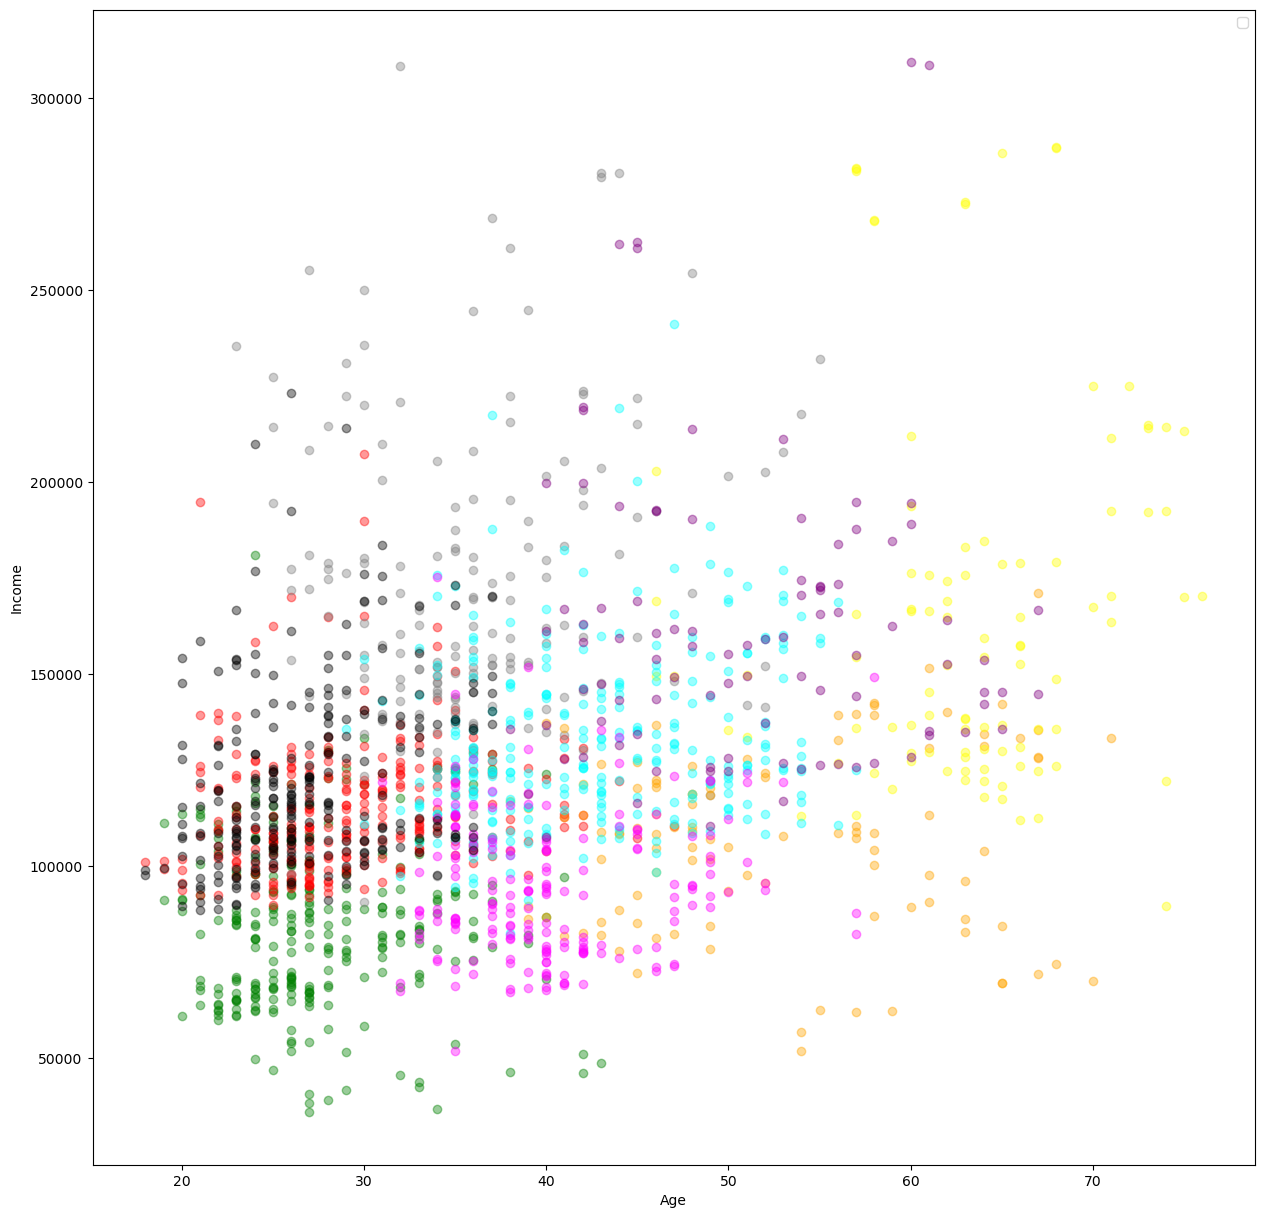

In [15]:
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]
df3 = df[df.cluster == 3]
df4 = df[df.cluster == 4]
df5 = df[df.cluster == 5]
df6 = df[df.cluster == 6]
df7 = df[df.cluster == 7]
df8 = df[df.cluster == 8]
df9 = df[df.cluster == 9]
df10 = df[df.cluster == 10]

plt.figure(figsize = (15,15))
plt.xlabel("Age")
plt.ylabel("Income")

plt.scatter(df1.Age, df1["Income"],color = "green", alpha = 0.4)
plt.scatter(df2.Age, df2["Income"],color = "red", alpha = 0.4)
plt.scatter(df3.Age, df3["Income"],color = "gray", alpha = 0.4)
plt.scatter(df4.Age, df4["Income"],color = "orange", alpha = 0.4)
plt.scatter(df5.Age, df5["Income"],color = "yellow", alpha = 0.4)
plt.scatter(df6.Age, df6["Income"],color = "cyan", alpha = 0.4)
plt.scatter(df7.Age, df7["Income"],color = "magenta", alpha = 0.4)
plt.scatter(df8.Age, df8["Income"],color = "black", alpha = 0.4)
plt.scatter(df9.Age, df9["Income"],color = "purple", alpha = 0.4)
plt.scatter(df10.Age, df10["Income"],color = "blue", alpha = 0.4)

plt.legend()
plt.show()